In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('ggplot')

In [39]:
# Read in the data
path = '../../data/simple_demographics.csv'
df = pd.read_csv(path)

In [40]:
# Print out the first 5 rows of the data
df.head()

,age,health,income,stress
0,21,74,42746,53
1,33,64,72792,49
2,30,78,74178,64
3,32,71,102548,63
4,57,46,120418,35


# Part 1: Basic Stats

Methods available include:
    
    .min() - Compute minimum value
    .max() - Compute maximum value
    .mean() - Compute mean value
    .median() - Compute median value
    .mode() - Compute mode value(s)
    .count() - Count the number of observations

In [41]:
# Remember, a dataset can have multiple modes
df.mode()

,age,health,income,stress
0,21.000,57.000,-7075,63.000
1,48.000,59.000,9823,nan
2,49.000,nan,10503,nan
3,59.000,nan,13576,nan
4,nan,nan,19325,nan
5,nan,nan,23778,nan
6,nan,nan,28169,nan
7,nan,nan,37375,nan
8,nan,nan,37834,nan
9,nan,nan,39114,nan


# Part 2: Box Plot

The box plot is a standardized way of displaying the distribution of the data. It's made up of two parts:

** The Box **
- extends from the 25th percentile to the 75th percentile
- the difference between the two ends is known as the inter-quartile range (IQR)
- the median, or 50th percentile, is represented with a line in the box

** The Whiskers **
- the lower whisker extends to the greater of the minimum of the data or the 25th percentile minus 1.5 times the IQR
```
a = df.min()
iqr = df.quantile(0.75) - df.quantile(0.25)
b = df.quantile(0.25) - 1.5 * iqr
lower_whisker = max(a, b)
```
- the upper whisker extends to the lesser of the maximum of the data or the 75th percentile plush 1.5 times the IQR
```
a = df.max()
iqr = df.quantile(0.75) - df.quantile(0.25)
b = df.quantile(0.75) + 1.5 * iqr
upper_whisker = min(a, b)
```
- if the whiskers don't reach to the `min` or `max` of the data, then points outside the whiskers are indicated on the box plot
- **NOTE: the whiskers always extend to an actual point in the data! Therefore, if the whiskers extend to `1.5 * IQR` then they will actually show as extending to the most extreme data point within the whisker range**

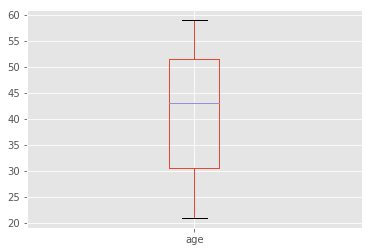

In [42]:
# Use a box plot to visualize the age data
df['age'].plot(kind='box')

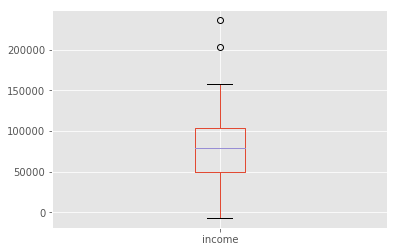

In [43]:
# Use a box plot to visualize the income data
df['income'].plot(kind='box')

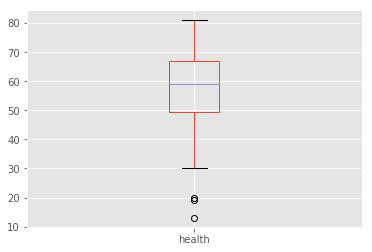

In [44]:
# Write the code to figure out the exact points for all of the parts of the boxplot of the 'health' column
df['health'].plot(kind='box')

# Part 3: Standard Deviation and Variance

**Variance** = measures how far a set of numbers are spread out from their average value
<br>
**Standard Deviation** = square root of the variance (measured in the same units as the data)

<img(src='images/samplevarstd.png', style="width: 60%; height: 60%")>

In [45]:
# Calculate the variance of the data
df.var()

age             141.482
health          209.938
income   1979108244.751
stress          271.240
dtype: float64

In [46]:
# Calculate the standard deviation of the data
df.std()

age         11.895
health      14.489
income   44487.169
stress      16.469
dtype: float64

### Parameter vs. Statistic

**Parameter** = characteristic about a ***population***
<br>
**Statistic** = characteristic about a ***sample***

Parameters are normally *unknown* -- we are not able to calculate characteristics about a population, but we can calculate them for a sample.
- For example, consider the average height for an American male
- The population in this case is **all American males**
- It's not feasible (nor possible) to measure **every** American male to calculate the mean -- if we could, that mean would be a **parameter of the population**
- We can, however, get data from a sample of men -- the mean of this sample is considered a **sample statistic**

### Standard Error

The standard error of a parameter is the standard deviation of its sampling distribution. In other words, the standard error measures the variance of a sample statistic.

In [47]:
# Generate 1000 samples of 10000 draws from a normal distribution
samples = pd.DataFrame(np.random.normal(loc=0, scale=1.0, size=(10000, 1000)))

In [48]:
# Take a look at the data -- it has 10,000 rows and 1,000 columns (each column is a sample)
samples.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2.241,0.719,0.613,0.715,0.769,1.345,0.192,-0.130,-0.232,0.310,...,0.605,-0.875,0.380,-1.217,-0.641,0.389,0.851,-0.898,0.840,-0.795
1,-0.133,0.052,0.236,-1.080,0.338,-0.504,-0.888,0.409,0.441,0.466,...,1.901,0.338,1.773,-0.380,0.362,-0.012,-2.011,0.253,-0.937,-1.358
2,-0.973,1.088,-0.977,0.177,0.064,2.000,-1.504,-1.129,0.268,0.543,...,0.349,-0.434,0.087,-0.275,-0.861,0.641,0.277,-1.104,1.223,0.753
3,-0.763,-1.627,-0.460,0.278,-0.498,-0.398,-1.186,-1.195,0.696,-0.778,...,-1.285,0.258,1.330,0.881,0.084,-0.068,0.537,-0.703,-2.603,-0.700
4,0.726,0.300,-0.999,0.919,1.952,-2.670,0.306,1.057,-0.977,0.372,...,-0.843,1.074,1.335,0.391,1.175,-1.380,0.172,1.099,-0.573,0.742


The mean of the population is `0`, however the mean of each sample varies.

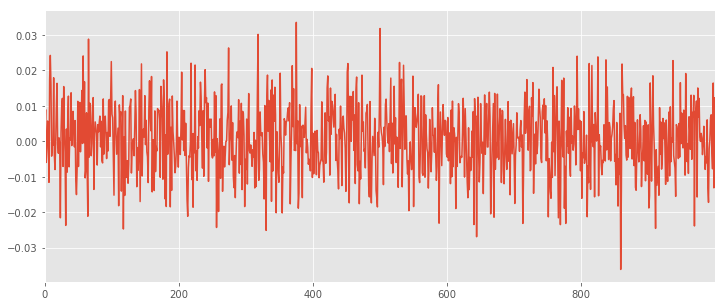

In [49]:
# Plot a line chart of the means of each column
samples.mean().plot(kind='line', figsize=(12,5))

The standard deviation of these 1,000 means is called the standard error of the mean. It's a measure of how far your sample mean is likely to be from the true population mean.

In [50]:
# Calculate the standard deviation of the means of each column
samples.mean().std()

0.009874709291846343

What if you only have one sample? The standard error of the mean can also be calculated by dividing the sample standard deviation by the square root of the sample size.

In [51]:
# Calculate the standard error of the mean using a random column
samples.iloc[:, 485].std() / np.sqrt(samples.iloc[:, 485].count())

0.01010026334134357

# Part 4: Normal Distribution

A normal distribution is a key assumption to many models we will be using later. But what is normal?

- The graph of the normal distribution depends on two factors - the **mean** and the **standard deviation**.
- The mean of the distribution determines the location of the center of the graph
- The standard deviation determines the height of the graph -- when the standard deviation is large, the curve is short and wide; when the standard deviation is small, the curve is tall and narrow. 
- All normal distributions look like a symmetric, bell-shaped curve.

Let's take a look at a few normal distributions that all have the same mean but different standard deviations.

In [52]:
# Generate 4 normal distributions each with a mean of 0, but with these standard deviations: [0.5, 1.0, 1.5, 2.0]
normal = pd.DataFrame(
    data={
        'std: 0.5': np.random.normal(loc=0, scale=0.5, size=10000),
        'std: 1.0': np.random.normal(loc=0, scale=1.0, size=10000),
        'std: 1.5': np.random.normal(loc=0, scale=1.5, size=10000),
        'std: 2.0': np.random.normal(loc=0, scale=2.0, size=10000)
    },
)

In [53]:
# Verify we generated the data we wanted
normal.head()

,std: 0.5,std: 1.0,std: 1.5,std: 2.0
0,0.332,0.020,0.115,-0.121
1,0.326,0.441,4.093,-0.179
2,0.188,-1.080,2.118,1.633
3,0.059,-1.090,1.966,0.231
4,0.533,0.581,1.676,-1.633


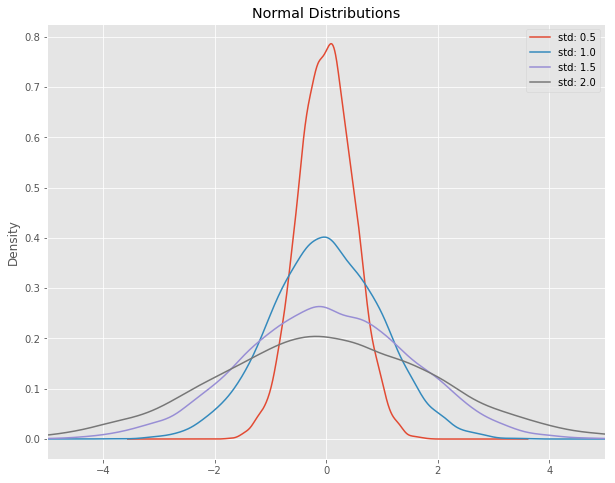

In [54]:
# Plot all of the columns using a 'density' plot
normal.plot(kind='density', figsize=(10, 8), title='Normal Distributions', xlim=(-5, 5))

### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. The skewness value can be positive or negative, or even undefined.

<img(src='images/skew.png', style="width: 70%; height: 70%")>

In [55]:
# We can use the scipy library for this
from scipy.stats import skewnorm

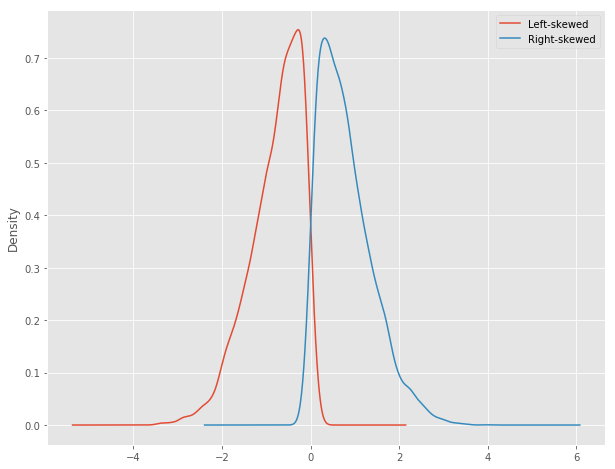

In [56]:
# Generate random variables from a skewed, normal distribution
right_skewed = skewnorm.rvs(a=10.0, loc=0.0, scale=1.0, size=10000)
left_skewed = skewnorm.rvs(a=-10.0, loc=0.0, scale=1.0, size=10000)

skew = pd.DataFrame(
    data={
        'Right-skewed': right_skewed,
        'Left-skewed': left_skewed
    },
)

skew.plot(kind='density', figsize=(10, 8))

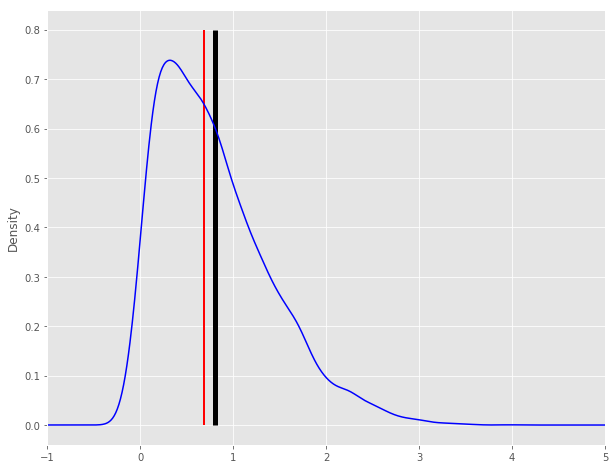

In [57]:
# Let's take a closer look at the right-skewed distribution
right_skew = skew['Right-skewed']

right_skew.plot(
    kind="density",
    figsize=(10,8),
    xlim=(-1,5),
    color='blue',
)

plt.vlines(
    right_skew.mean(),     # Plot black line at mean
    ymin=0, 
    ymax=0.8,
    linewidth=5.0,
    color='black',
)

plt.vlines(
    right_skew.median(),   # Plot red line at median
    ymin=0, 
    ymax=0.8, 
    linewidth=2.0,
    color='red',
)

# Part 5: Central Limit Theorem

The central limit theorem is a fundamental tool in statistics. It says, with some assumptions, that sampling distributions are normal with a specific mean and standard deviation. It's a vital tool in data science when working with large data sets. Often a random sample (or many random samples) can tell us crucial information about a much larger dataset.

For example, if you work at a large social media company and you want to estimate the distribution of the ages of your users for targetting ads, you could extract the ages of hundreds of millions of users from your database and compute the distribution. This will take a lot of time and effort, and it's usually enough to simply look at a much smaller but random subset of users.

### Sampling Distributions

Usually we do not know the true distribution of our data so we study it by looking at the distribution of random samples. It turns out that we can often identify the underlying "true" distribution within any necessary degree of approximation as long as we can obtain enough data.

#### Customers Arriving to Our Store

Let's say that we want to model the arrival of customers to our store. Each customer arrival is independent (i.e. the time one customer arrives doesn't depend on the time that any other customer arrives). The time between customer arrivals can be modeled with an exponential distribution.

For our **population** assume we know that **50 customers** arrive per hour on average. We want to know the expected time between each arrival.

In [58]:
# We can use these functions to plot an exponential distribution

lam = 50 / 60.

def exp_pdf(x):
    return lam * np.exp(-lam * x)

def exp_cdf(x):
    return 1 - np.exp(-lam * x)

Mean of Distribution: 1.2
Median of Distribution: 0.833333333333
Standard Deviation of Distribution: 1.2


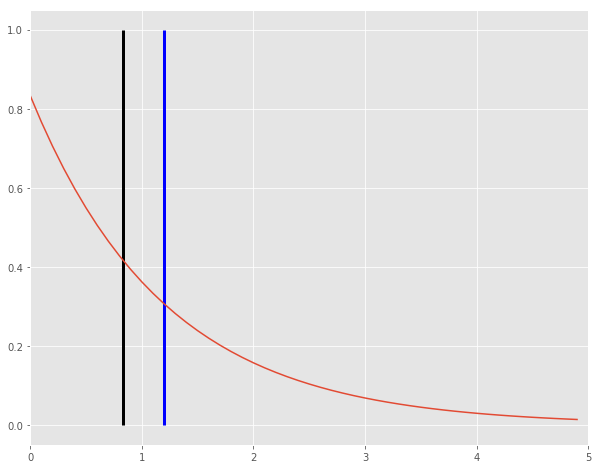

In [59]:
# Plot the PDF of an exponential distribution where 50 customers arrive every 60 minutes
x = np.arange(0, 5, 0.1)
pd.Series(x, index=x).apply(exp_pdf).plot(kind='line', figsize=(10,8), xlim=(0, 5))

# Add lines to highlight the mean and median
plt.vlines(
    1 / lam, # mean
    ymin=0, 
    ymax=1.0, 
    linewidth=3.0, 
    color='blue',
)

plt.vlines(
    lam, # median
    ymin=0, 
    ymax=1.0, 
    linewidth=3.0, 
    color='black',
)

print 'Mean of Distribution: {}'.format(1 / lam)
print 'Median of Distribution: {}'.format(lam)
print 'Standard Deviation of Distribution: {}'.format(1 / lam)

This is a **probability density function (PDF)**. The x-value is the time between two customers and the y-value is the probability of seeing that x value.

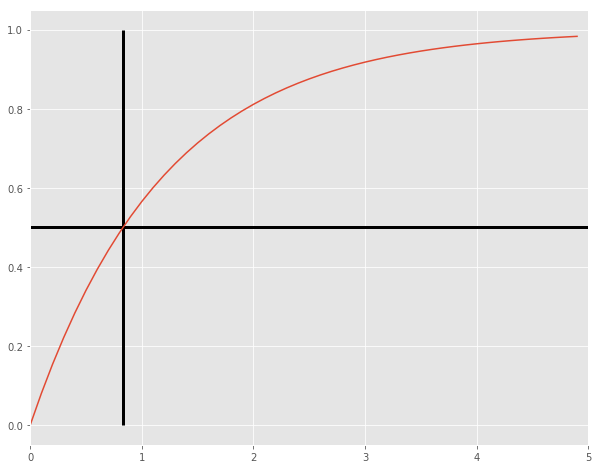

In [60]:
# Plot the CDF of an exponential distribution where 50 customers arrive every 60 minutes
x = np.arange(0, 5, 0.1)
pd.Series(x, index=x).apply(exp_cdf).plot(kind='line', figsize=(10,8), xlim=(0, 5))

# Add lines to highlight that lambda is the median of the distribution
plt.vlines(50 / 60., ymin=0, ymax=1.0, linewidth=3.0, color='black')
plt.hlines(0.5, xmin=0, xmax=5.0, linewidth=3.0, color='black')

This is a **cumulative density function (PDF)**. The x-value is the time between two customers and the y-value is the probability of seeing that x value *or less*. The median of a distribution is the corresponding value on the x axis for a y-value of 0.5.

Now, let's take a look at random samples from our distribution. Re-run the following cell serveral times to see how the samples change.

Mean of Sample: 1.18582022337
Standard Deviation of Sample: 1.07763912926


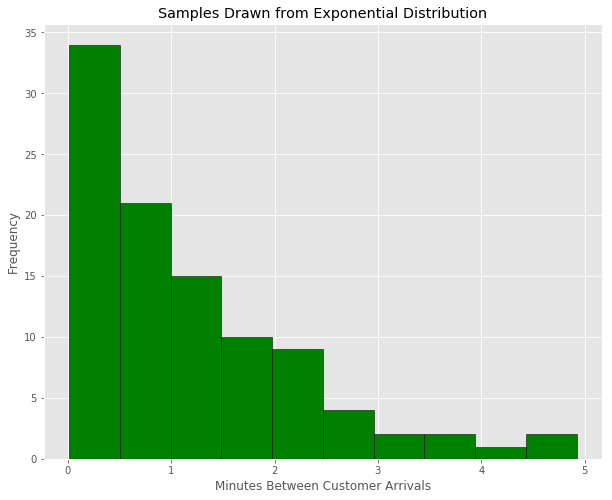

In [61]:
# Generate random samples from an exponential distribution where 50 customers arrive every 60 minutes
customers = pd.Series(np.random.exponential(scale=1/lam, size=100))

# Plot the samples using a histogram
customers.plot(
    kind='hist', 
    figsize=(10,8), 
    ec='black', # color of lines to separate the bars, not important to remember
    title='Samples Drawn from Exponential Distribution',
    color='green',
)

plt.xlabel('Minutes Between Customer Arrivals')

# Print out the sample mean and standard deviation
print 'Mean of Sample: {}'.format(customers.mean())
print 'Standard Deviation of Sample: {}'.format(customers.std())

A histogram of our random sample looks approximately like our distribution and the sample has a mean and standard deviation in the ballpark of our true parameter values. Let's take a look at the distribution of the means of many such random samples.

Mean of Sample Means: 1.20241303723
Standard Deviation of Sample Means: 0.0373648223678


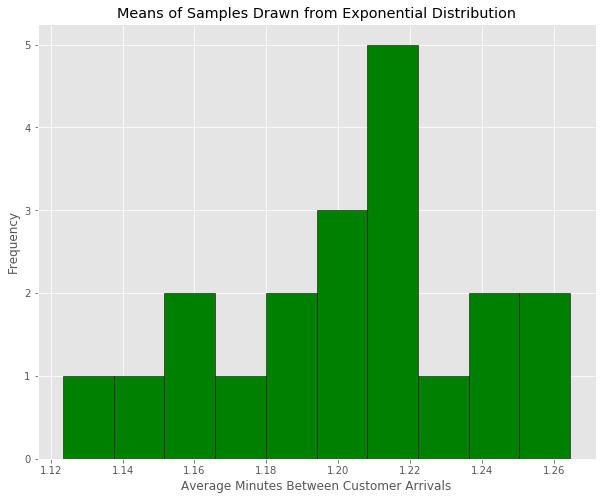

In [62]:
# Generate random samples from an exponential distribution where 50 customers arrive every 60 minutes
customers = pd.DataFrame(np.random.exponential(scale=1/lam, size=(1000, 20)))

# Plot the samples using a histogram
customers.mean().plot(
    kind='hist', 
    figsize=(10,8), 
    ec='black', # color of lines to separate the bars, not important to remember
    title='Means of Samples Drawn from Exponential Distribution',
    color='green',
)

plt.xlabel('Average Minutes Between Customer Arrivals')

# Print out the mean and standard deviation of our sample means
print 'Mean of Sample Means: {}'.format(customers.mean().mean())
print 'Standard Deviation of Sample Means: {}'.format(customers.mean().std())

The mean of the means is much closer to our actual mean. Let's take many samples and see if things get better.

Mean of Sample Means: 1.19984963198
Standard Deviation of Sample Means: 0.038035045051


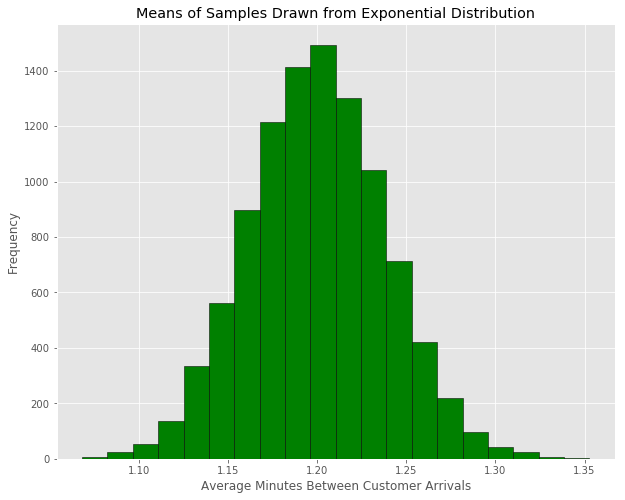

In [63]:
# Generate random samples from an exponential distribution where 50 customers arrive every 60 minutes
customers = pd.DataFrame(np.random.exponential(scale=1/lam, size=(1000, 10000)))

# Plot the samples using a histogram
customers.mean().plot(
    kind='hist', 
    figsize=(10,8), 
    ec='black', # color of lines to separate the bars, not important to remember
    title='Means of Samples Drawn from Exponential Distribution',
    color='green',
    bins=20,
)

plt.xlabel('Average Minutes Between Customer Arrivals')

# Print out the mean and standard deviation of our sample means
print 'Mean of Sample Means: {}'.format(customers.mean().mean())
print 'Standard Deviation of Sample Means: {}'.format(customers.mean().std())

That's really close! The distribution looks like a normal distribution too. Let's do a quick curve fit (called a kernel density estimate). First we'll look at a large sample, and then at the distribution of means of many samples.

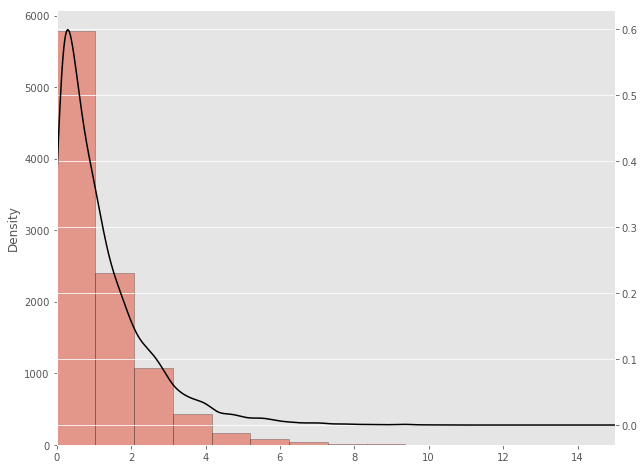

In [64]:
# First, plot one sample
customers.iloc[0].plot(
    kind='hist', 
    figsize=(10, 8), 
    ec='black', 
    alpha=0.5
)

customers.iloc[0].plot(
    kind='density',
    figsize=(10, 8), 
    secondary_y=True, 
    color='black', 
    xlim=(0, 15)
)

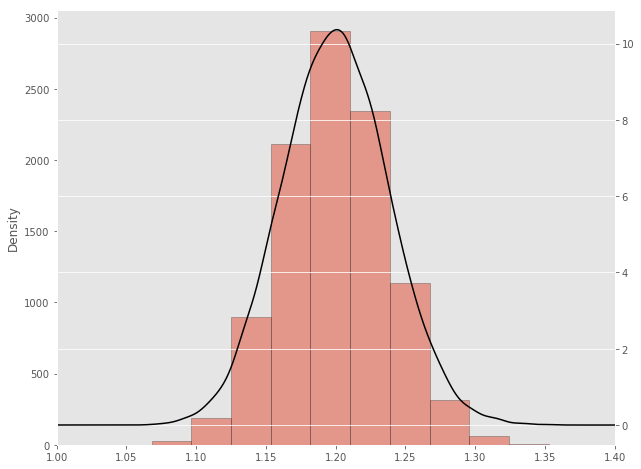

In [65]:
# Then plot all of the sample means
customers.mean().plot(
    kind='hist', 
    figsize=(10, 8), 
    ec='black', 
    alpha=0.5
)

customers.mean().plot(
    kind='density',
    figsize=(10, 8), 
    secondary_y=True, 
    color='black', 
    xlim=(1.0, 1.4)
)

## The Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) explains what we've just observed. It says that, as the size $n$ of a sample increases, that:
* the mean of the sample $\bar{x}$ converges to the mean of the true distribution, and
* the standard deviation $s$ of the sample is the same as the true standard deviation $\sigma$

The sampling distribution of the means has:
* The same mean as the original distribution
* A standard deviation $\hat{\sigma}$ given by the true standard deviation divided by $\sqrt{n}$:
$$\sigma' = \frac{\sigma}{\sqrt{n}}$$

This quantity is usually referred to as the *standard error*.

In practice, we typically use these results as follows. Take a large random sample and calculate the sample mean $\bar{x}$ and the sample deviation $s$. If we were to do this repeatedly, then 95% of the time, the true mean would lie in the interval:
$$(\bar{x} - 2s, \bar{x} + 2s)$$

As the sample size $n$ gets large, the error $s$ gets small. So for a large enough sample we can get a very good approximation of the true mean.

# Part 6: Confidence Intervals

Confidence intervals are one of the most commonly used statistical methods to summarize
uncertainty in parameter estimates from data analyses.

A confidence interval (CI) is the range of values the true value in the population is expected to fall within. It is based on a certain level of confidence.

The width of the CI changes with changes in sample size. The width of the confidence interval is larger with small sample sizes. You don’t have enough data to get a clear picture of what is going on so your range of possible values is wider. The width of the CI decreases with an increasing sample size $n$.

### Bootstrapping

A common way of creating confidence intervals is through a process called bootstrapping. Essentially, bootstrapping just means sampling with replacement. Through this process, we can turn one sample of 1,000 observations into 1,000 samples of 1,000 observations.

Let's try calculating the confidence interval around the average number of days in a month users are active on our website.

In [66]:
# Read in the active_users dataset
path = '../../data/active_users.csv'
active = pd.read_csv(path)['l30']

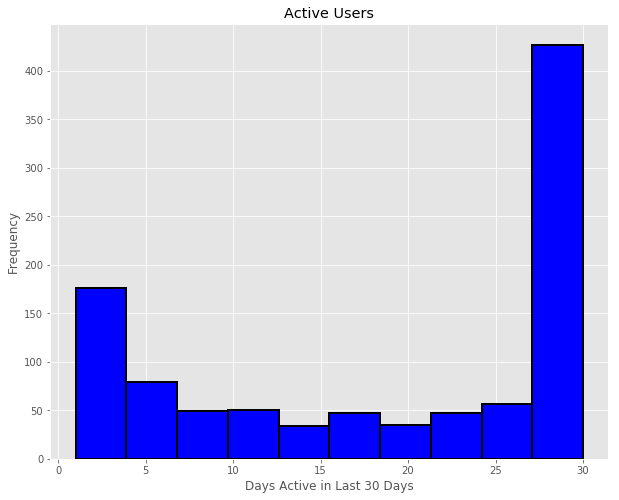

In [67]:
# Plot the data using a histogram
active.plot(
    kind='hist', 
    bins=10, 
    figsize=(10,8),
    color='blue',
    title='Active Users',
    ec='black',
    linewidth=2.0,
)

plt.xlabel('Days Active in Last 30 Days')

In [68]:
# Use np.random.choice to generate 1,000 bootstrapped samples, each with 1,000 observations
boot = pd.DataFrame(np.random.choice(active, replace=True, size=(1000,1000)))

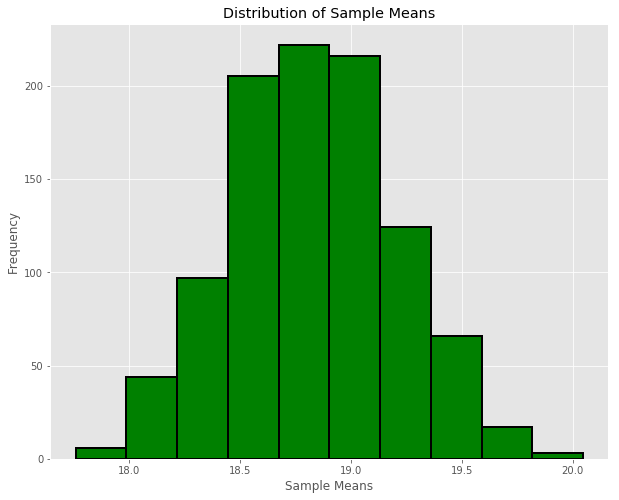

In [69]:
# Plot the distribution of sample means
means = boot.mean()

means.plot(
    kind='hist',
    figsize=(10,8),
    color='green',
    title='Distribution of Sample Means',
    ec='black',
    linewidth=2.0
)

plt.xlabel('Sample Means')

In [70]:
# Let's calculate the 95% confidence interval
# It extends from the 2.5th percentile to the 97.5th percentile
bottom = means.quantile(0.025)
top = means.quantile(0.975)

print '95% Confidence Interval: [{bottom}, {top}]'.format(**locals())

95% Confidence Interval: [18.117925, 19.5372]


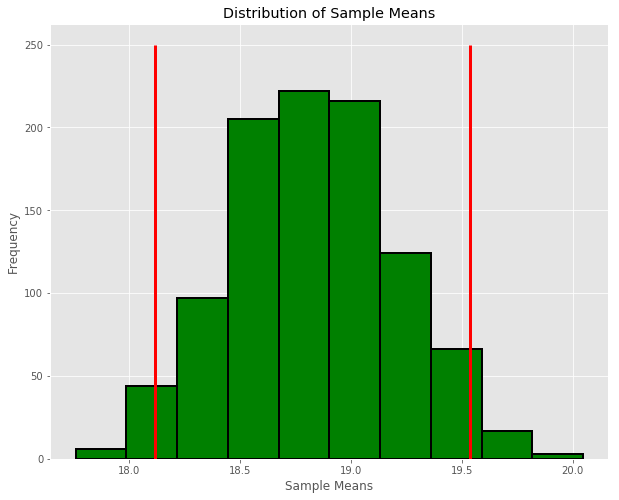

In [71]:
# Let's add the 95% confidence interval to the graph
means.plot(
    kind='hist',
    figsize=(10,8),
    color='green',
    title='Distribution of Sample Means',
    ec='black',
    linewidth=2.0
)

plt.vlines(
    bottom,
    ymin=0,
    ymax=250,
    color='red',
    linewidth=3.0,
)

plt.vlines(
    top,
    ymin=0,
    ymax=250,
    color='red',
    linewidth=3.0,
)

plt.xlabel('Sample Means')

# Part 7: Hypothesis Testing and P-Values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** - a hypothesis that is the opposite of the null. Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**, at some level of significance.

Note that "failing to reject" the null is ***not*** the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

### One-Tailed Hypothesis Test

We can use a one-tailed hypothesis test to find out if the true parameter (e.g., mean, proportion, difference in means, differences in proportions) is greater than ***or*** less than a value, **but not both**. Because of this, in practice, most data scientists tend to use two-tailed hypothesis tests.

### Two-Tailed Hypothesis Test

Suppose we want to test the hypothesis that males have more friends on social media platforms than females. Our null hypothesis would be that the relative difference in friends between males and females is 0 and the alternative hypothesis would be that the relative difference is not 0 (can be greater than or less than 0).

In [72]:
# Read in the friends dataset
path = '../../data/friends.csv'
friends = pd.read_csv(path)

In [73]:
# Calculate the average number of friends between males and females
friends.groupby('gender').mean()

,friends
gender,
FEMALE,414.245
MALE,478.931


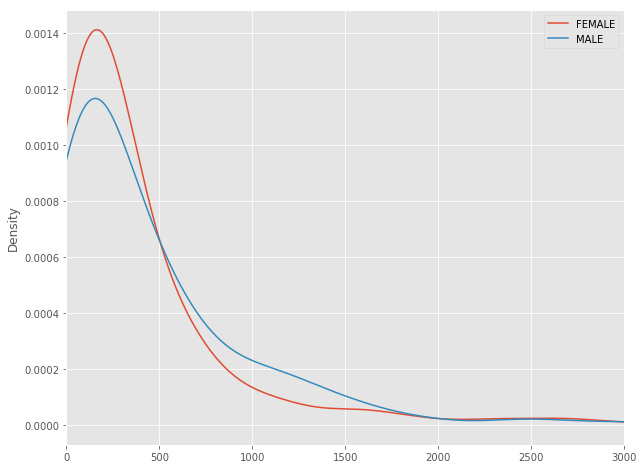

In [74]:
# Plot the distributions as density plot
fig, ax = plt.subplots(figsize=(10,8))

for label, data in friends.groupby('gender'):
    data['friends'].plot(kind='density', ax=ax, label=label, legend=True, xlim=(0, 3000))